### 가축사육현황 EDA
---


데이터분석 목적

- “분기별 가축사육현황”
- ‘마리수-번식우’, ‘번식우’,‘마리수’,’번식우가 아닌 소 중 1세 미만(암,수) 제외’에 해당하는 값을 사용할 예정.
- 번식우: 기르기 위한 소이기 때문에 제외한 값도 확인해보고자함
- 1세 미만(암,수)는 출하 월령에 미치지 못하기 때문.
- ‘마리수-번식우’,’마리수’ 각각 y값과 EDA


데이터 셋 분석 기간
- 2013.01.01 ~ 2018.12.31

In [203]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [204]:
breeding_status_data = pd.read_csv("./data/02. 가축사육현황.csv", encoding="cp949")
target_data = pd.read_csv("./data/01. 축산물 실시간 경매시황중계정보.csv", encoding="cp949")

print(f"Breeding status Columns \n  {breeding_status_data.columns}")
print()
print(f"Target data columns \n {target_data.columns}")

Breeding status Columns 
  Index(['Unnamed: 0', '연도', '월', '마리수', '번식우', '1세미만(암)', '1세미만(수)', '1~2세(암)',
       '1~2세(수)', '2세이상(암)', '2세이상(수)'],
      dtype='object')

Target data columns 
 Index(['경매시간', '경매기준시분초', '경매 구분', '경매 구분 명', '도매시장코드', '도매시장명', '한우 평균경매 금액',
       '한우 평균경매 금액_상승하강', '한우 1B+ 경매단가', '한우 3B 경매단가', '한우 경매 예상 두수',
       '한우 경매 낙찰 두수', '육우 경매 금액', '육우 전날 경매금액 차이', '육우 경매 예상 두수', '육우 경매 두수',
       '돼지 박피 경매 금액', '돼지 박피 전날 경매금액 차이', '돼지 박피 경매 두수', '돼지 탕박 경매 금액',
       '돼지 탕박 전날 경매금액 차이', '돼지 탕박 경매 두수', '돼지 경매 두수'],
      dtype='object')


In [205]:
# Create Data Profile Report
"""
breeding_data_profile = status_df.profile_report()
breeding_data_profile.to_file("./data/breeding_status_report.html")

target_data_profile = target_data.profile_report()
target_data_profile.to_file("./data/축산물_실시간_경매시황중계정보.html")
"""

'\nbreeding_data_profile = status_df.profile_report()\nbreeding_data_profile.to_file("./data/breeding_status_report.html")\n\ntarget_data_profile = target_data.profile_report()\ntarget_data_profile.to_file("./data/축산물_실시간_경매시황중계정보.html")\n'

In [206]:
target_data = target_data[target_data["도매시장명"] == "전국"]
target_data = target_data[target_data["경매 구분 명"] == "경매용+지육상장"]
target_data = target_data[["경매시간", "경매기준시분초", "한우 평균경매 금액"]]
sort_target_data = target_data.sort_values(by=["경매시간", "경매기준시분초"]) # Sort descending by Time
sort_target_data[["경매시간", "경매기준시분초"]] = sort_target_data[["경매시간", "경매기준시분초"]].astype("str")
print(f"Target Data shape : {target_data.shape}")
sort_target_data.head()

Target Data shape : (1030, 3)


,경매시간,경매기준시분초,한우 평균경매 금액
34946,20130101,221543,0
34896,20130102,221544,13203
34867,20130103,221545,13743
34811,20130104,221545,13945
34763,20130105,221546,0


In [207]:
print("Target Data Statistics Summary")
sort_target_data.describe()

Target Data Statistics Summary


,한우 평균경매 금액
count,1030.000000
mean,10011.446602
std,6798.090624
min,0.000000
25%,0.000000
50%,13392.500000
75%,14454.750000
max,20019.000000


### LiveStock Data EDA
---

In [208]:
# Drop Unnamed field
status_df = breeding_status_data[['연도', '월', '마리수', '번식우', '1세미만(암)', '1세미만(수)', '1~2세(암)',
       '1~2세(수)', '2세이상(암)', '2세이상(수)']]
# fit date range
status_df = status_df[status_df["연도"] >= 2013]
status_df[["연도", "월"]] = status_df[["연도", "월"]].astype("str")

In [209]:
print(f"LiveStock Status Data Shape : {status_df.shape}")
status_df.head()

LiveStock Status Data Shape : (28, 10)


,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수)
52,2013,3,"2,966","1,580",396,470,409,479,996,216
53,2013,6,"3,064","1,590",383,459,412,491,"1,037",281
54,2013,9,"3,043","1,563",369,438,419,496,"1,024",296
55,2013,12,"2,918","1,500",367,434,420,491,956,251
56,2014,3,"3,083","1,467",378,457,442,514,"1,027",266


In [210]:
# convert string value to interger

status_df["마리수"] = status_df["마리수"].apply(lambda x : int(x.replace(",", "")))
status_df["번식우"] = status_df["번식우"].apply(lambda x : int(x.replace(",", "")))

In [211]:
status_df.head()

,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수)
52,2013,3,2966,1580,396,470,409,479,996,216
53,2013,6,3064,1590,383,459,412,491,"1,037",281
54,2013,9,3043,1563,369,438,419,496,"1,024",296
55,2013,12,2918,1500,367,434,420,491,956,251
56,2014,3,3083,1467,378,457,442,514,"1,027",266


In [212]:
print("LiveStock Data Statistics Summary")
status_df.describe()

LiveStock Data Statistics Summary


,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(수)
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3038.928571,1608.857143,394.500000,477.857143,402.714286,471.178571,249.678571
std,110.832850,135.560760,23.359509,30.358005,14.777002,18.320306,42.816623
min,2821.000000,1415.000000,362.000000,434.000000,376.000000,435.000000,172.000000
25%,2965.250000,1473.500000,376.750000,456.500000,392.500000,462.000000,220.250000
50%,3031.000000,1612.000000,385.500000,471.000000,401.500000,470.500000,253.500000
75%,3114.000000,1720.500000,411.500000,499.250000,409.750000,480.000000,274.250000
max,3269.000000,1843.000000,441.000000,537.000000,442.000000,514.000000,344.000000


In [213]:
print("===LiveStock Check Data Missing Values=====")
status_df.isna().any()

===LiveStock Check Data Missing Values=====


연도         False
월          False
마리수        False
번식우        False
1세미만(암)    False
1세미만(수)    False
1~2세(암)    False
1~2세(수)    False
2세이상(암)    False
2세이상(수)    False
dtype: bool

결측치 존재 x

### Check Data Distribution with plot
---

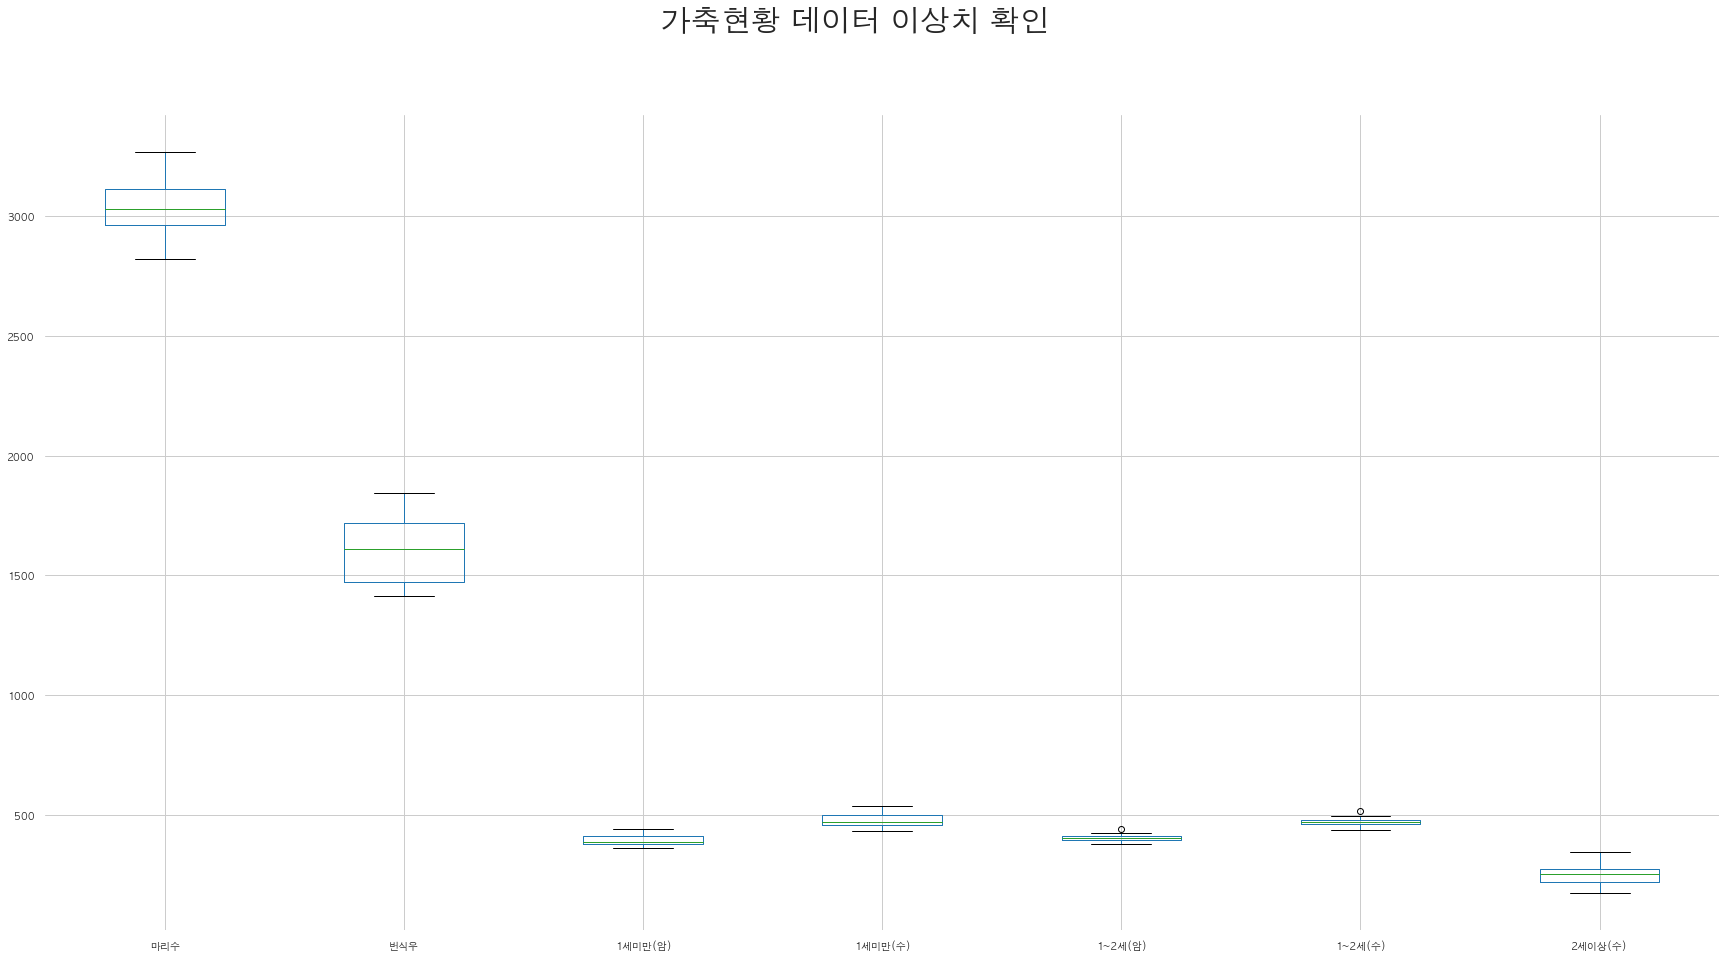

In [214]:
plt.figure(figsize=(30,15))
plt.suptitle("가축현황 데이터 이상치 확인", fontsize=30)
check_box_data.boxplot(figsize=(8,8))

이상치에 대해서 신경쓸 필요 없을 듯

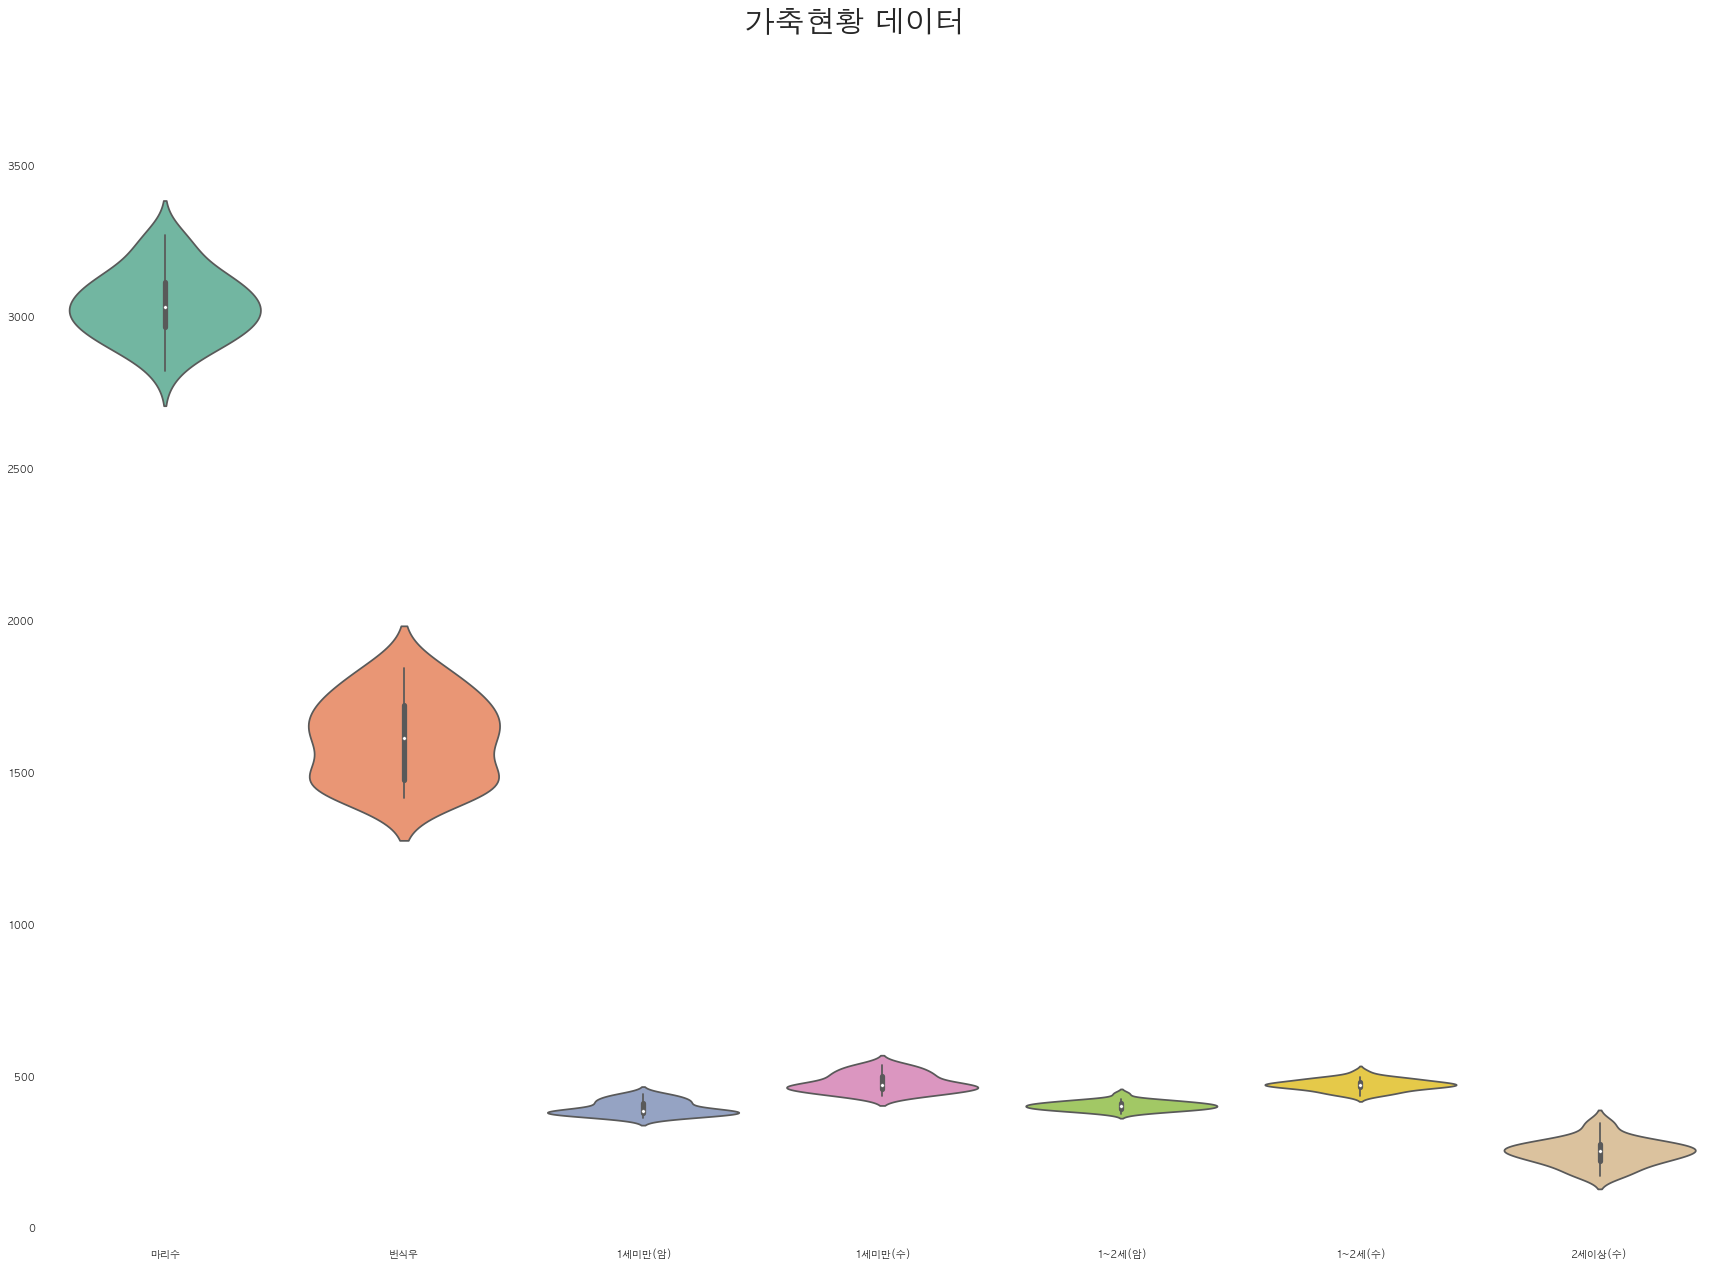

In [215]:
plt.figure(figsize=(30,20))
plt.suptitle("가축현황 데이터", fontsize=30)
ax = sns.violinplot(data=check_box_data, scale="width", palette="Set2")

In [216]:
sort_target_data["한우 평균경매 금액"]

34946        0
34896    13203
34867    13743
34811    13945
34763        0
         ...  
61       16612
45           0
36           0
27           0
9            0
Name: 한우 평균경매 금액, Length: 1030, dtype: int64

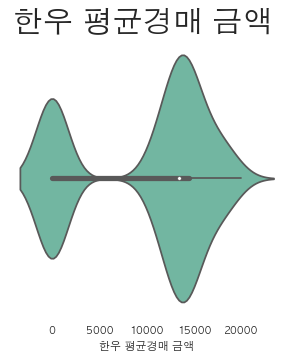

In [219]:
plt.figure(figsize=(5,5))
plt.suptitle("한우 평균경매 금액", fontsize=30)
ax = sns.violinplot(sort_target_data["한우 평균경매 금액"], palette="Set2")

대체로 정규분포의 형태를 보임

### Concat target & livestock status data
---

##### Y(평균한우가격)과 상관분석을 위한 data merging

- dataframe 공통된 "분기"칼럼 생성
- outer join으로 데이터 결합

In [220]:
def convert_quarter(month):
    if 1 <= month <= 3:
        return 1
    elif 3 < month <= 6:
        return 2
    elif 6 < month <= 9:
        return 3
    else:
        return 4

In [221]:
sort_target_data["연도"] = sort_target_data["경매시간"].apply(lambda x : str(x)[:4])
sort_target_data["분기"] = sort_target_data["경매시간"].apply(lambda x : convert_quarter(int(x[4:6])))
status_df["분기"] = status_df["월"].apply(lambda x : convert_quarter(int(x)))
print("====livestock status target data=====")
status_df.head()

====livestock status target data=====


,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),분기
52,2013,3,2966,1580,396,470,409,479,996,216,1
53,2013,6,3064,1590,383,459,412,491,"1,037",281,2
54,2013,9,3043,1563,369,438,419,496,"1,024",296,3
55,2013,12,2918,1500,367,434,420,491,956,251,4
56,2014,3,3083,1467,378,457,442,514,"1,027",266,1


In [222]:
print("====Check target data=====")
sort_target_data.head()

====Check target data=====


,경매시간,경매기준시분초,한우 평균경매 금액,연도,분기
34946,20130101,221543,0,2013,1
34896,20130102,221544,13203,2013,1
34867,20130103,221545,13743,2013,1
34811,20130104,221545,13945,2013,1
34763,20130105,221546,0,2013,1


In [223]:
merge_df = pd.merge(status_df, sort_target_data, on=["연도", "분기"], how="right")
merge_df["월"] = merge_df["경매시간"].apply(lambda x : str(x)[4:6])
merge_df[["연도", "월"]] = merge_df[["연도", "월"]].astype("int")
print("====Final Data Set Shape===")
merge_df.sort_values(by=["연도", "분기"])

====Final Data Set Shape===


,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),분기,경매시간,경매기준시분초,한우 평균경매 금액
0,2013,1,2966,1580,396,470,409,479,996,216,1,20130101,221543,0
1,2013,1,2966,1580,396,470,409,479,996,216,1,20130102,221544,13203
2,2013,1,2966,1580,396,470,409,479,996,216,1,20130103,221545,13743
3,2013,1,2966,1580,396,470,409,479,996,216,1,20130104,221545,13945
4,2013,1,2966,1580,396,470,409,479,996,216,1,20130105,221546,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2018,9,3168,1758,418,506,408,479,"1,097",260,3,20180921,235902,16612
1026,2018,9,3168,1758,418,506,408,479,"1,097",260,3,20180925,235851,0
1027,2018,9,3168,1758,418,506,408,479,"1,097",260,3,20180929,235839,0
1028,2018,10,3113,1744,424,515,407,478,"1,071",218,4,20181003,235928,0


In [224]:
"""
뻘짓의 흔정
# stauts_df data size fit
data = []
years = sort_target_data["연도"].unique()

for y in years:
    one_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] <= 3)] 
    two_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 3) & (sort_target_data["월"] <= 6)] 
    three_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 6) & (sort_target_data["월"] <= 9)] 
    four_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 9)] 
    

    print(f"data length : {len(data)}")

    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "3")].iloc[0])] * len(one_q)
    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "6")].iloc[0])] * len(two_q)
    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "9")].iloc[0])] * len(three_q)
    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "12")].iloc[0])] * len(four_q)

print(f"data length : {len(data)}")
df = pd.DataFrame(data, columns=status_df.columns)
"""

'\n뻘짓의 흔정\n# stauts_df data size fit\ndata = []\nyears = sort_target_data["연도"].unique()\n\nfor y in years:\n    one_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] <= 3)] \n    two_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 3) & (sort_target_data["월"] <= 6)] \n    three_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 6) & (sort_target_data["월"] <= 9)] \n    four_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 9)] \n    \n\n    print(f"data length : {len(data)}")\n\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "3")].iloc[0])] * len(one_q)\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "6")].iloc[0])] * len(two_q)\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "9")].iloc[0])] * len(three_q)\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (stat

### Correlation 

In [225]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return 

corr_data = merge_df.drop(["연도", "월", "분기"], axis=1)
corr = corr_data.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(수),한우 평균경매 금액
마리수,1.00,0.23,0.02,0.04,0.43,0.45,0.74,0.01
번식우,0.23,1.00,0.75,0.71,-0.03,0.09,-0.29,0.00
1세미만(암),0.02,0.75,1.00,0.97,-0.28,-0.23,-0.56,0.05
1세미만(수),0.04,0.71,0.97,1.00,-0.32,-0.29,-0.55,0.07
1~2세(암),0.43,-0.03,-0.28,-0.32,1.00,0.98,0.24,-0.05
1~2세(수),0.45,0.09,-0.23,-0.29,0.98,1.00,0.25,-0.07
2세이상(수),0.74,-0.29,-0.56,-0.55,0.24,0.25,1.00,-0.01
한우 평균경매 금액,0.01,0.00,0.05,0.07,-0.05,-0.07,-0.01,1.00


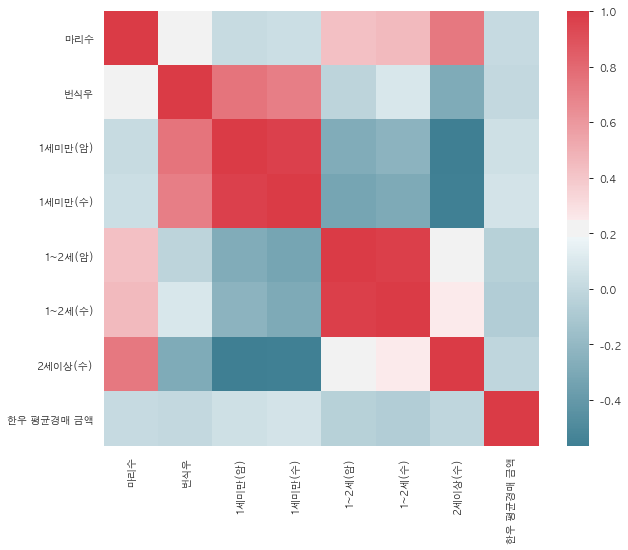

In [226]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### 상관성 결과 해석

---

- 전체적으로 가축사육현황의 feature값들과 예측값(y)에 해당하는 상관이 매우 낮게 나옴. 
- 사후해석 : 지역별로 나눤 데이터라면 유의미하게 예측값과 어느정도 상관성을 기대해볼 수도 있지만 가축 현황 데이터 자체가 전국적으로 평균값으로 만들어진 것이기 때문에 예측값에 큰 영향을 주지 못하는 것 같음.

